In [ ]:
# This script calculates the sharpness of oscillations

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import pac
import shap_R as til
from scipy.signal import firwin

**Load data**

In [3]:
lfp = til.loadPD()
Fs, t, S, Sdy, flo, fhi = til.loadmeta()
print(range(S))

range(0, 13)


In [4]:

t = np.arange(0, 30, 1 / Fs) 
print(lfp)
print(flo)

{'B': array([ array([ 0.27251019,  0.19316779,  0.11455966, ..., -0.57756275,
       -0.63401347, -0.66496473]),
       array([ 0.18830844,  0.16185181,  0.12915871, ..., -0.16872793,
       -0.21794893, -0.24896703]),
       array([ 0.06581159,  0.01093083, -0.04193366, ...,  0.09776975,
        0.01438406, -0.06396191]),
       array([ 0.54408663,  0.55389838,  0.57110384, ...,  0.67027357,
        0.57754144,  0.48146689]),
       array([ 1.71983908,  1.73664626,  1.73217251, ..., -2.26822583,
       -2.09798142, -1.93192142]),
       array([ 0.73307034,  0.80523254,  0.85351239, ...,  0.33675568,
        0.32363898,  0.29812755]),
       array([-0.60166718, -0.59496427, -0.57329822, ..., -0.69319199,
       -0.69541636, -0.68424042]),
       array([-0.41585135, -0.39951641, -0.37456563, ..., -0.10027022,
       -0.09521705, -0.08353415]),
       array([-0.00868721, -0.02511724, -0.02414505, ..., -0.75550968,
       -0.6887568 , -0.58986501]),
       array([-0.0867388 , -0.06906614,

 **Compute features of waveform shape**

In [5]:
import shape
pks, trs = shape.findpt(
            lfp['B'][4], (13,30), Fs=1000, boundary=100)
print(pks)

[  113   158   194   230   298   337   405   446   480   517   583   630
   662   700   732   764   810   886   918   967  1002  1080  1112  1142
  1199  1262  1288  1338  1373  1434  1465  1503  1565  1623  1702  1734
  1779  1817  1872  1920  1968  2005  2065  2107  2142  2181  2221  2257
  2313  2350  2402  2439  2477  2511  2540  2619  2686  2718  2774  2812
  2856  2894  2930  2970  3009  3040  3073  3113  3180  3217  3257  3292
  3341  3367  3415  3470  3506  3567  3617  3668  3701  3746  3798  3829
  3912  3955  3995  4040  4075  4107  4163  4217  4262  4288  4341  4419
  4477  4517  4575  4615  4686  4719  4780  4819  4870  4925  4957  5021
  5049  5110  5146  5190  5224  5274  5309  5398  5451  5480  5530  5560
  5630  5673  5710  5746  5821  5881  5943  5996  6036  6104  6174  6244
  6317  6357  6422  6459  6513  6581  6610  6661  6699  6764  6808  6837
  6881  6913  6964  6999  7055  7110  7163  7215  7261  7290  7321  7365
  7400  7441  7469  7517  7569  7626  7692  7722  7

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


In [6]:


widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = til.measure_shape(lfp, widthS=widthS)

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


# A
### Locating oscillatory extrema

In [7]:
# Select one recording
group ='B'
subj=3
x = lfp[group][subj]

# Bandpass filter in be ta frequency range
w = 3
xbeta = til.firf(x, flo, Fs, w = w, rmvedge=False)

# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


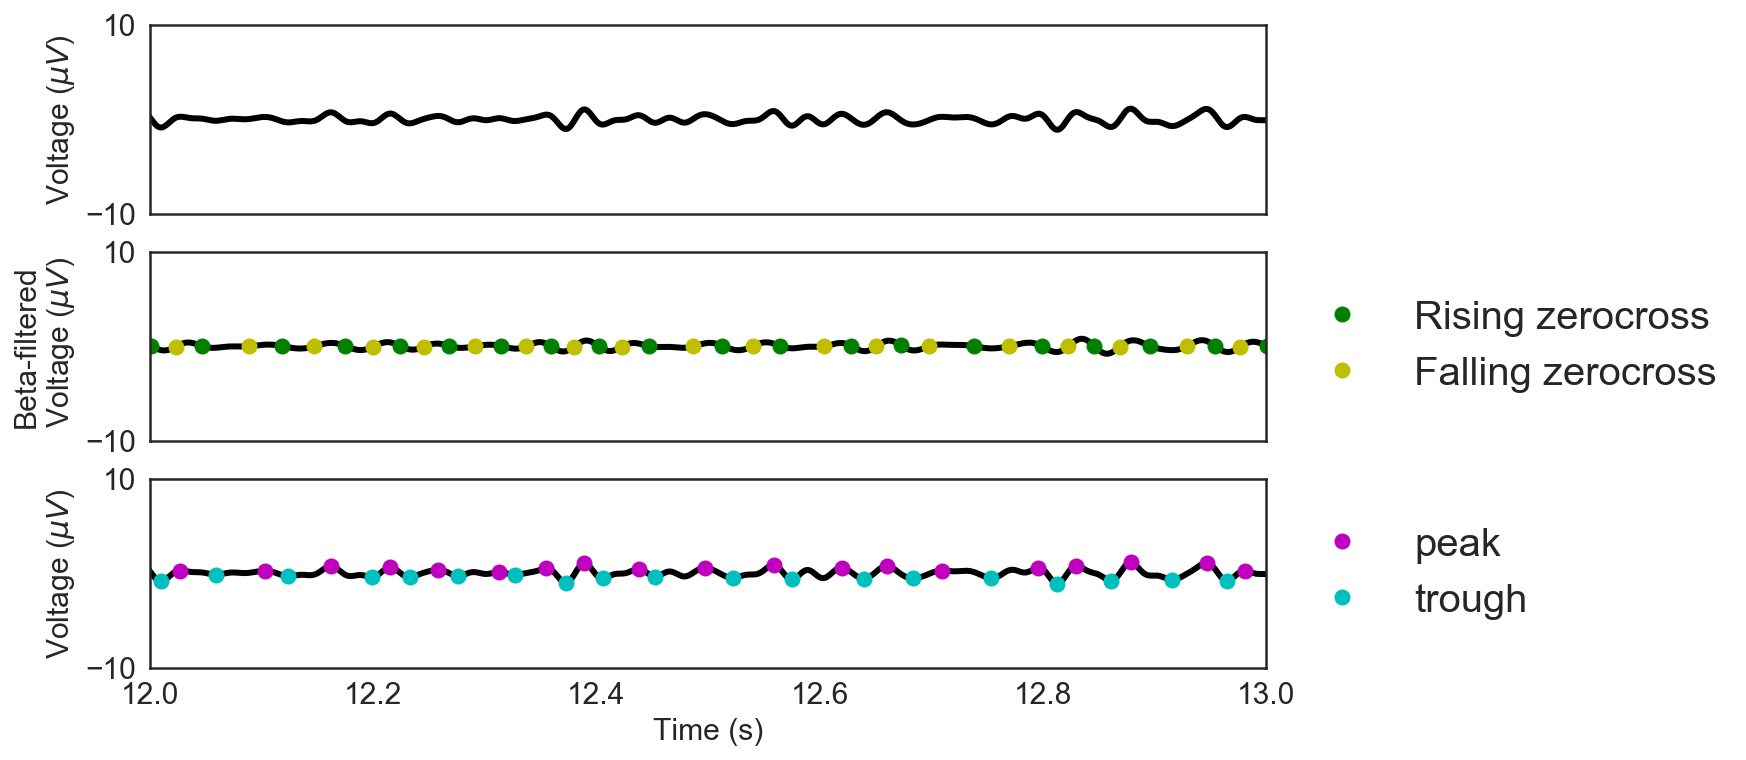

In [8]:
xlim = (12,13)
xlim2 = (4.83,4.88)
ylim = (-10,10)
pkidx = 104
tridx = 103

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)

# B
### Estimating extrema sharpness

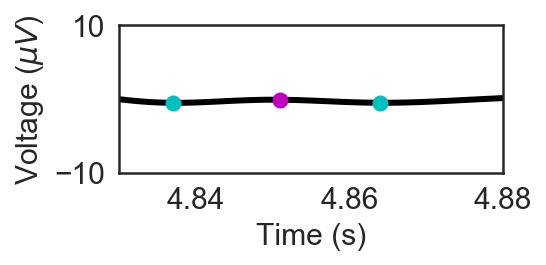

In [9]:
plt.figure(figsize=(4,2))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim2)
plt.tick_params(labelsize=15)
plt.xlabel('Time (s)',size=15)

plt.tight_layout()

In [10]:
print(round(x[pks[group][subj][pkidx]]))
print(round(x[pks[group][subj][pkidx]-widthS]))
print(round(x[pks[group][subj][pkidx]+widthS]))
print(round(pksharp[group][subj][pkidx]))

print(round(x[trs[group][subj][tridx]]))
print(round(x[trs[group][subj][tridx]-widthS]))
print(round(x[trs[group][subj][tridx]+widthS]))
print(round(trsharp[group][subj][tridx]))

0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0


In [11]:
import imp
imp.reload(til)

<module 'shap_R' from '/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/shap_R.py'>

# C
### Sharpness in 1 subject before DBS

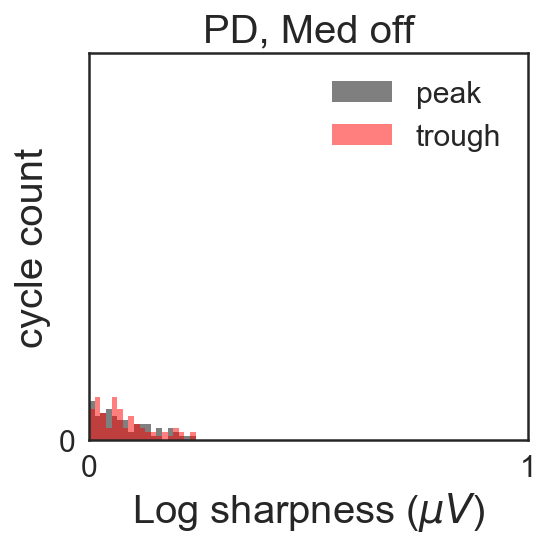

In [12]:
s = 4

Nbins = 20
bins=np.linspace(0,np.max(np.hstack((np.log10(pksharp['B'][s]),np.log10(trsharp['B'][s])))),Nbins)

plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['B'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['B'][s]),bins,color='r',alpha=0.5,label='trough')
plt.title('PD, Med off',size=20)
plt.ylabel('cycle count',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# D
### Sharpness in 1 subject during DBS

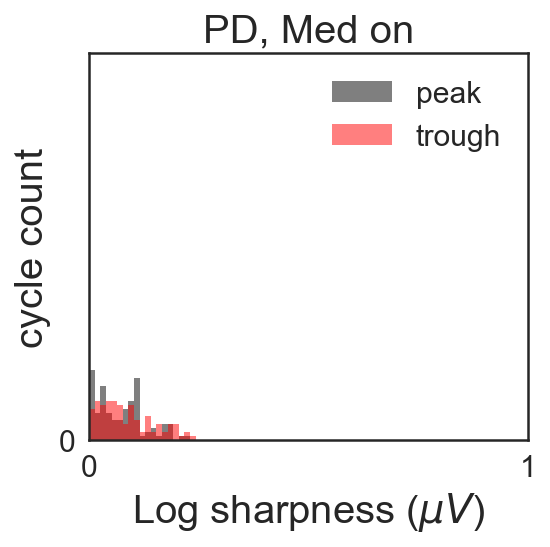

In [13]:
plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['D'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['D'][s]),bins,color='r',alpha=0.5,label='trough')
plt.ylabel('cycle count',size=20)
plt.title('PD, Med on',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# E
### Sharpness ratio change with DBS

Ttest_relResult(statistic=2.407677245780544, pvalue=0.03305254864142395)


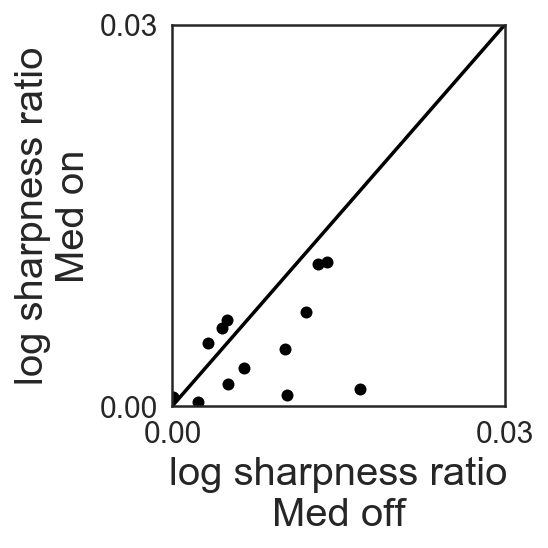

In [14]:
from plt import scatt_2cond
scatt_2cond(esrs['B'],esrs['D'],ms=12,
           lims = (0,.03), xlabel = 'log sharpness ratio\nMed off',
            ylabel = 'log sharpness ratio\nMed on',figsize=(4,4))
print(sp.stats.ttest_rel(esrs['B'],esrs['D']))

import scipy.io as sio
sio.savemat('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/sharpness_R.mat', {'esrs':esrs})
plt.savefig('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/Results/rightSTN_sharpnessRatio.png')